In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [18]:
d = pd.read_excel("/content/drive/MyDrive/Shaina and John research/data samples/Shaina collection/MBAD/annotations.xlsx")
# To display the top 5 rows 
df=d.copy()
df.drop(['Unnamed: 0.1', 'survey_record_id','sentence_group_id','sentence_id','survey_completed'], axis=1, inplace=True)

df.head(5) 

,Unnamed: 0,created_at,label,words,factual,group_id,text,link,type,topic,outlet,mturk_id,age,gender,education,native_english_speaker,political_ideology,followed_news_outlets,news_check_frequency
0,0,2020-08-12 06:09:53,Non-biased,NaN,Entirely factual,67,The transgender effort to suppress any recogni...,https://www.breitbart.com/politics/2019/02/21/...,right,gender,breitbart,Jonathan Daniel Garavito,29,Male,Bachelor’s degree,Native speaker,7,"['ABC News', 'MSNBC']",Every day
1,1,2020-08-12 06:10:21,Non-biased,NaN,Expresses writer’s opinion,67,Radical Virginia Citizens Defense League has o...,https://www.alternet.org/2020/01/pro-gun-prote...,left,gun-control,alternet,Jonathan Daniel Garavito,29,Male,Bachelor’s degree,Native speaker,7,"['ABC News', 'MSNBC']",Every day
2,2,2020-08-12 06:10:35,Non-biased,NaN,Somewhat factual but also opinionated,67,Miller is the architect of President Donald Tr...,https://www.nbcnews.com/news/latino/after-step...,left,white-nationalism,msnbc,Jonathan Daniel Garavito,29,Male,Bachelor’s degree,Native speaker,7,"['ABC News', 'MSNBC']",Every day
3,3,2020-08-12 06:10:51,Non-biased,NaN,Expresses writer’s opinion,67,"The House Democrats’ 1,400-page coronavirus re...",https://www.breitbart.com/politics/2020/03/24/...,right,coronavirus,breitbart,Jonathan Daniel Garavito,29,Male,Bachelor’s degree,Native speaker,7,"['ABC News', 'MSNBC']",Every day
4,4,2020-08-12 06:11:04,Non-biased,NaN,Expresses writer’s opinion,67,A specter is haunting the West; our elites see...,https://thefederalist.com/2019/11/08/nationali...,right,white-nationalism,federalist,Jonathan Daniel Garavito,29,Male,Bachelor’s degree,Native speaker,7,"['ABC News', 'MSNBC']",Every day


In [27]:
df.describe()


,Unnamed: 0,group_id,age,political_ideology
count,17775.000000,17775.000000,17775.000000,17775.000000
mean,11278.431505,42.912236,37.735640,-1.474205
std,6528.730534,24.645737,10.986286,6.454495
min,0.000000,1.000000,0.000000,-10.000000
25%,5440.500000,21.000000,29.000000,-7.000000
50%,11364.000000,43.000000,35.000000,-2.000000
75%,16936.500000,64.000000,45.000000,4.000000
max,22470.000000,85.000000,71.000000,10.000000


**Histogram**

Text(0.5, 0, 'gender')

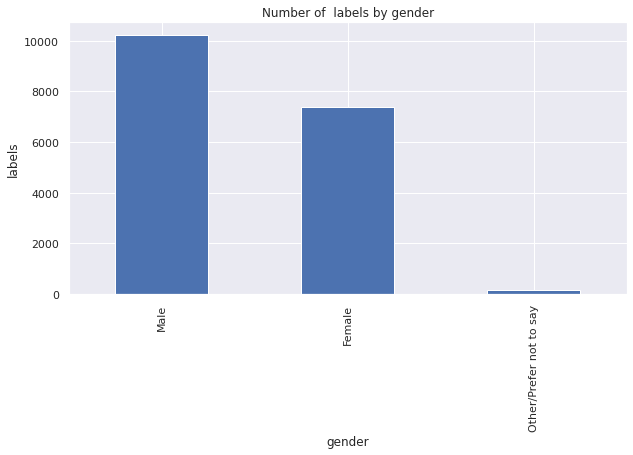

In [20]:
df.gender.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of  labels by gender")
plt.ylabel('labels')
plt.xlabel('gender')

**heatmap**

,Unnamed: 0,group_id,age,political_ideology
Unnamed: 0,1.000000,0.013051,0.004366,-0.017324
group_id,0.013051,1.000000,-0.037135,-0.060247
age,0.004366,-0.037135,1.000000,0.106416
political_ideology,-0.017324,-0.060247,0.106416,1.000000


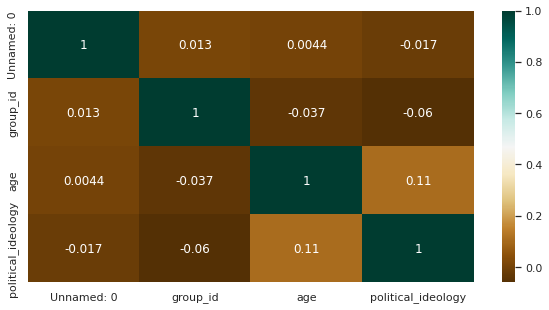

In [21]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

**scatterplot**

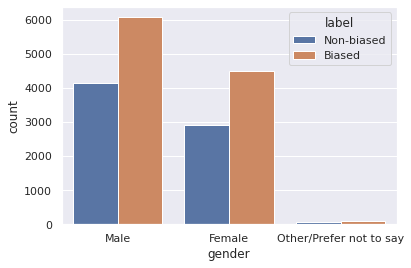

In [29]:
sns.countplot(x="gender", hue="label", data=df);


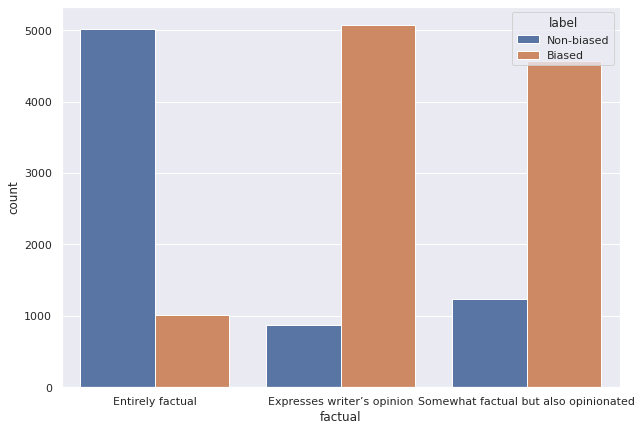

In [38]:
plt.figure(figsize=(10,7))

sns.countplot(x="factual", hue="label", data=df)

**histograms**

Text(0.5, 0, 'Age')

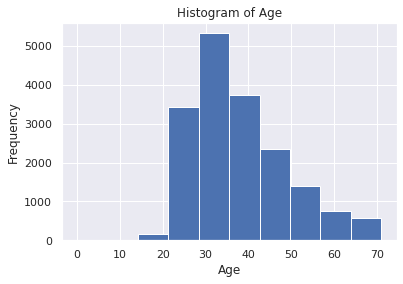

In [40]:
import seaborn as sns
df['age'].plot(kind='hist')
plt.title('Histogram of Age')
plt.xlabel('Age')

# word cloud

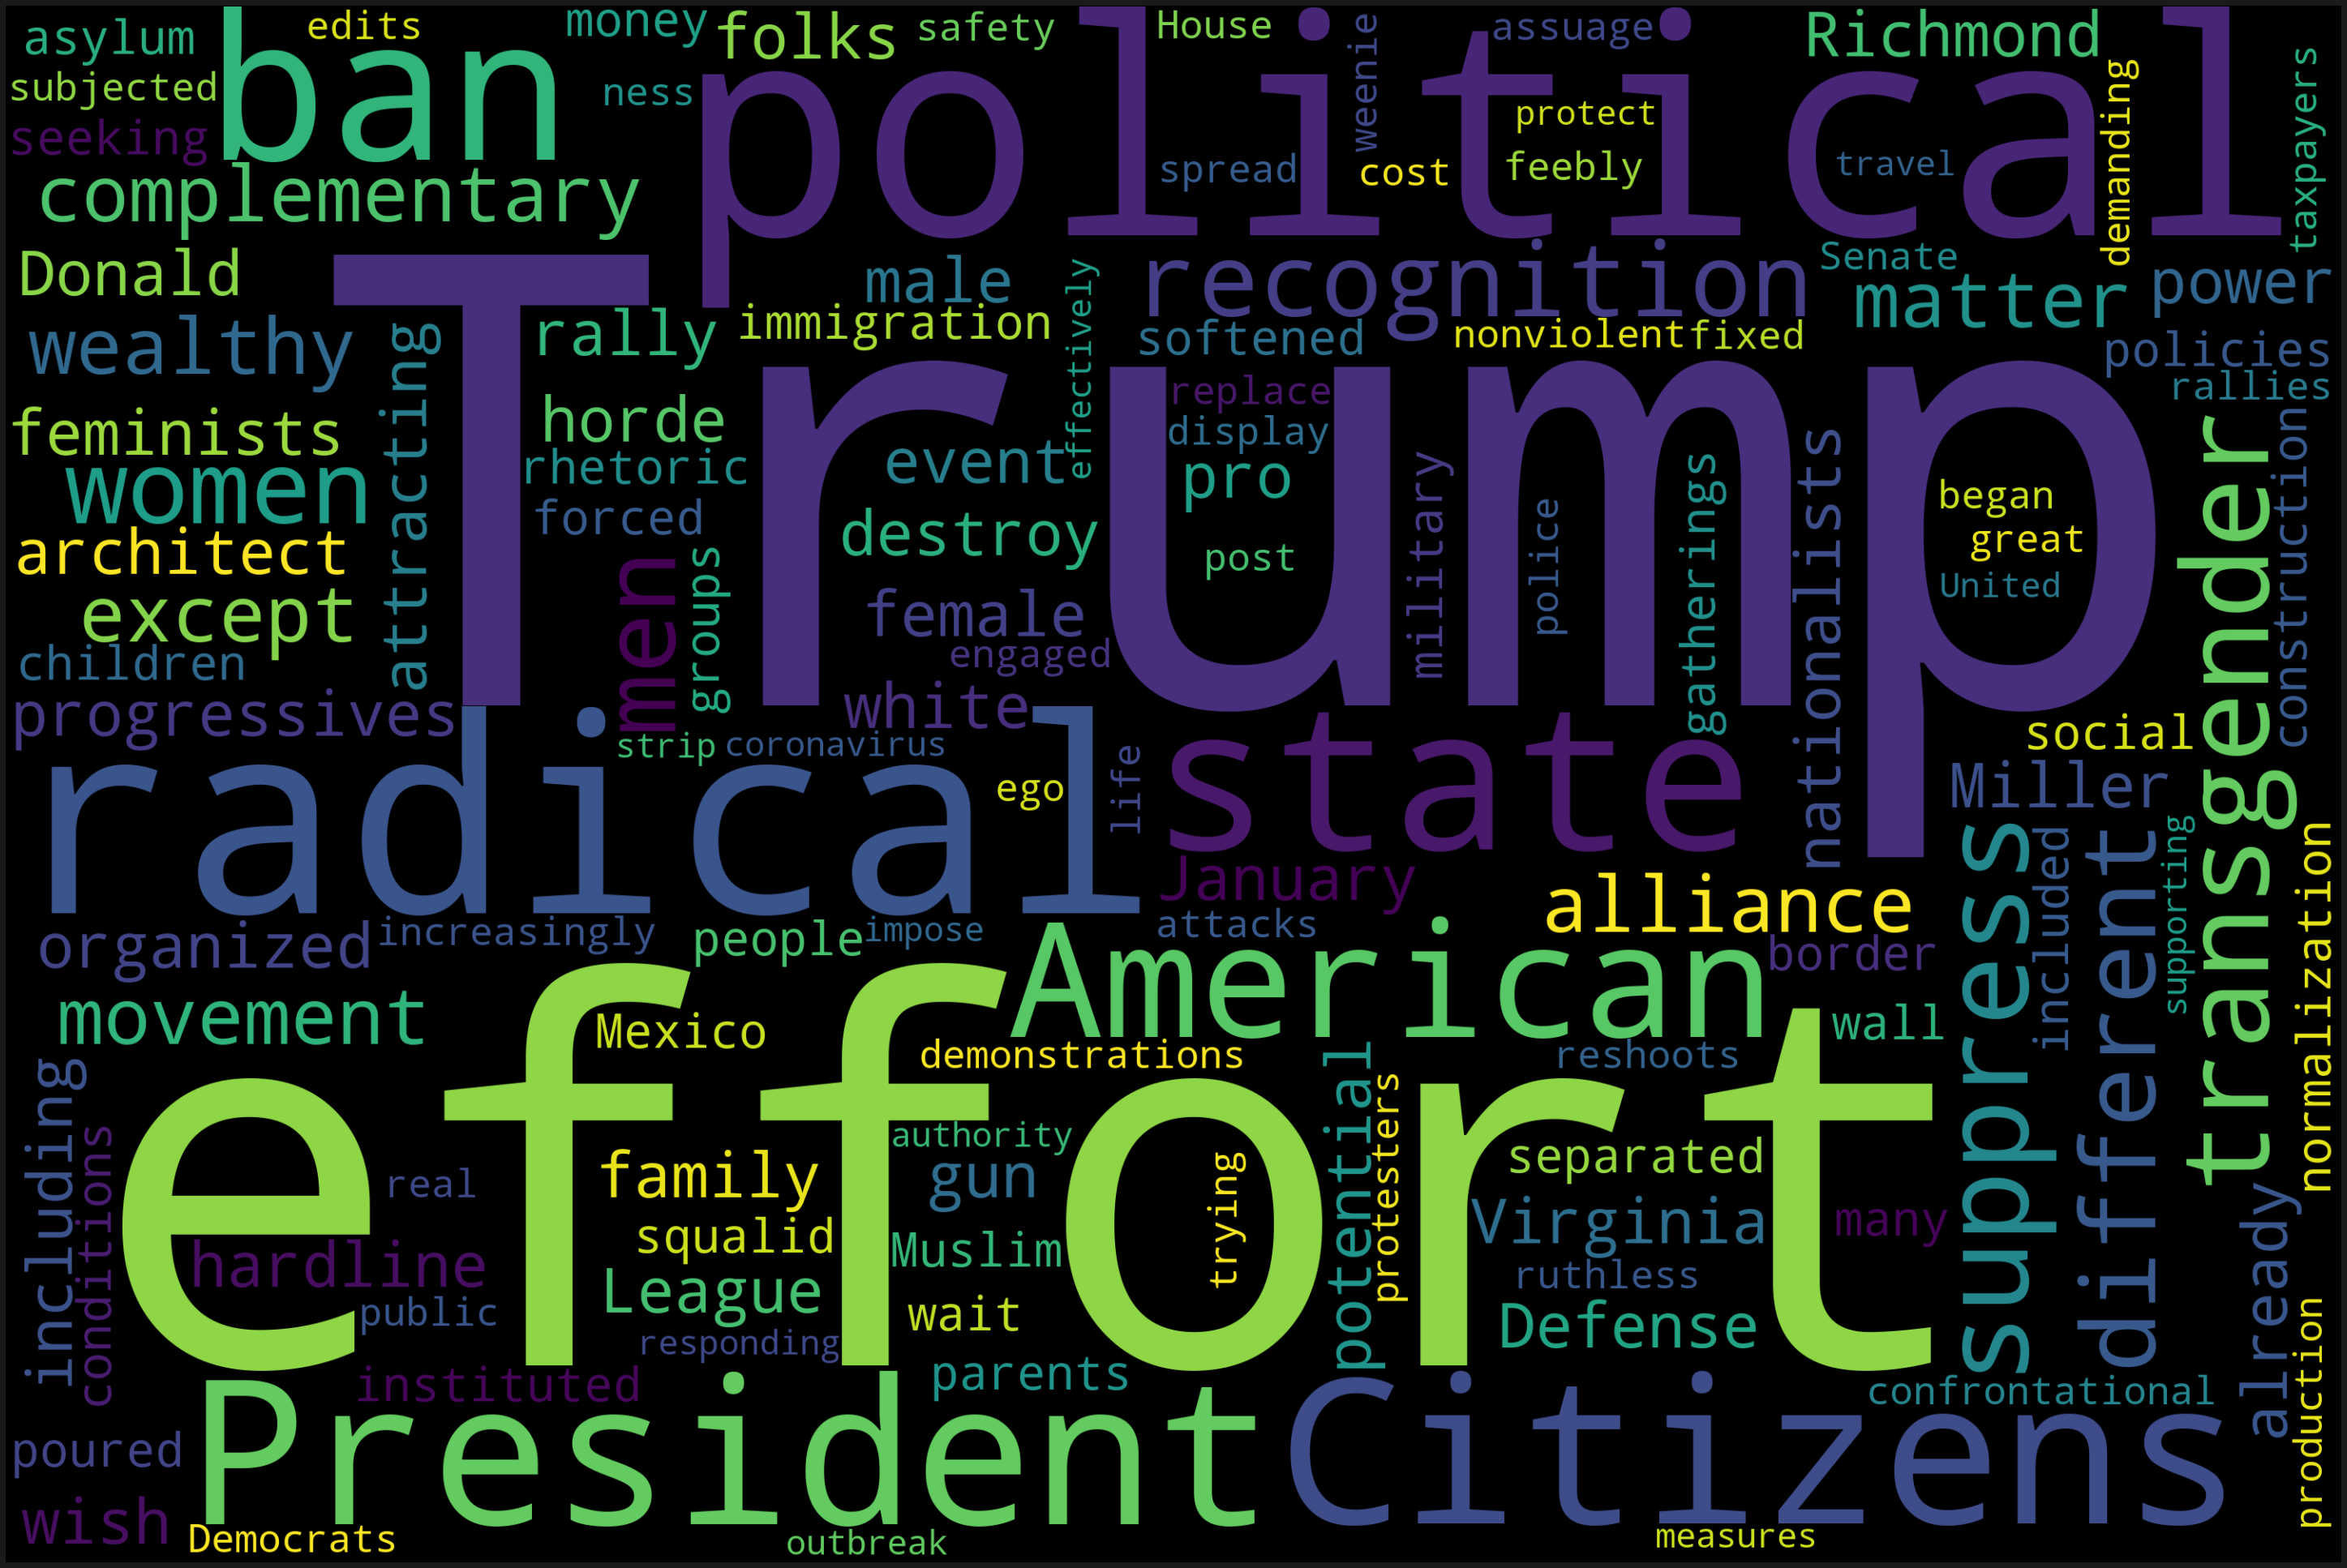

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

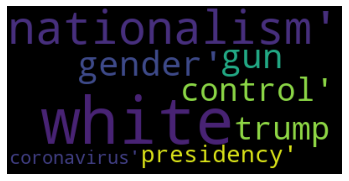

In [51]:

text = df['topic'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# text polarity

In [54]:
from textblob import TextBlob
df['polarity']=df['text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [56]:
print("3 random texts with highest polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['text']):
  print('Review {}:\n'.format(index+1),review)

3 random texts with highest polarity:
Review 1:
 In the wake of the great Bronx injury epidemic of 2019, the Yankees continue to overhaul their people and processes for their training and conditioning.
Review 2:
 The Republican president assumed he was helping the industry at the expense of the environment – a trade-off Trump was happy to make since he rejects climate science anyway. 
Review 3:
 In the wake of the great Bronx injury epidemic of 2019, the Yankees continue to overhaul their people and processes for their training and conditioning.


In [57]:
print("3 Random Texts with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Texts with Lowest Polarity:
Review 1:
 UFC Middleweight Champion Israel Adesanya’s comment that his opponent will "crumble like the Twin Towers", in addition to being terrible and inappropriate, also makes no sense. 
Review 2:
 UFC Middleweight Champion Israel Adesanya’s comment that his opponent will "crumble like the Twin Towers", in addition to being terrible and inappropriate, also makes no sense. 
Review 3:
 The gruesome three-hour incident occurred between students of Jawaharlal Nehru University, who were protesting a fee hike on education, and youth wing members of Rashtriya Swayamsevak Sangh, a group closely tied to India's ruling Bharatiya Janata Party (BJP).


 plot polarities of text by news outlet

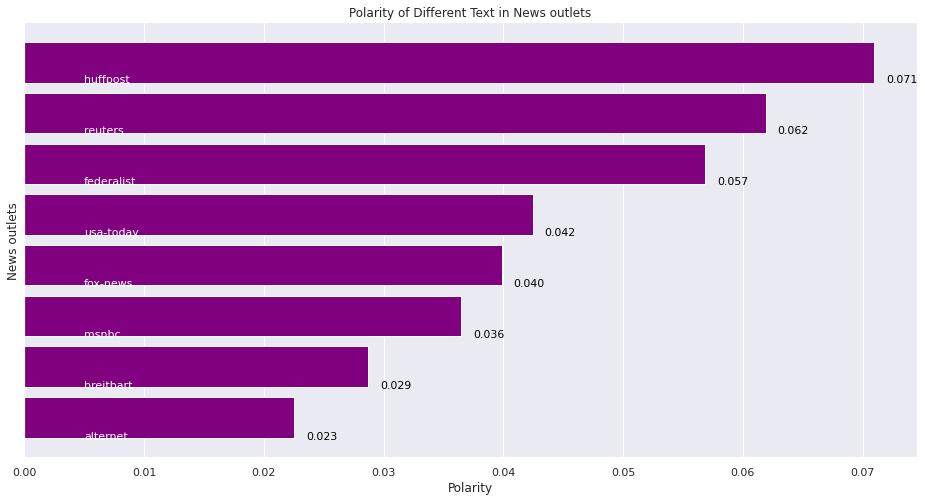

In [65]:
outlet_polarity_sorted=pd.DataFrame(df.groupby('outlet')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('News outlets')
plt.title('Polarity of Different Text in News outlets')
polarity_graph=plt.barh(np.arange(len(outlet_polarity_sorted.index)),outlet_polarity_sorted['polarity'],color='purple',)

# Writing outlet names on bar
for bar,outlet in zip(polarity_graph,outlet_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(outlet),va='center',fontsize=11,color='white')

# Writing outlet values on graph
for bar,polarity in zip(polarity_graph,outlet_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

 plot polarities of text for speakers

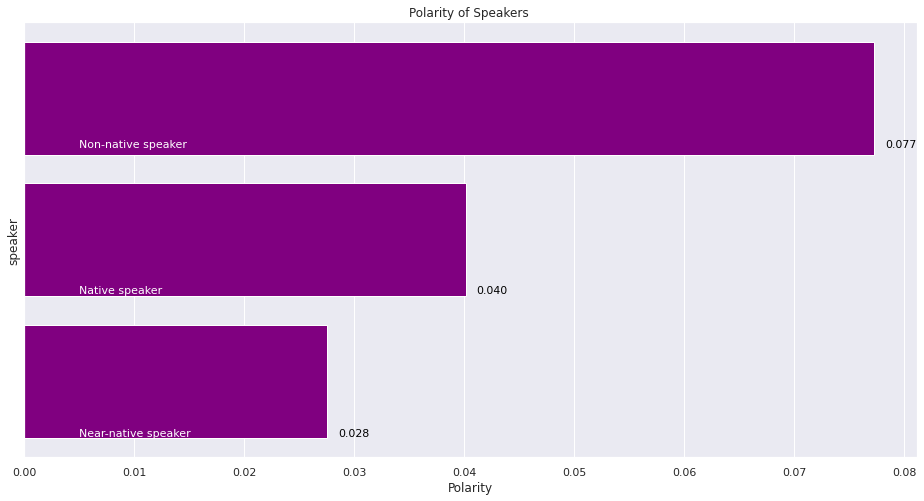

In [72]:
speaker_polarity_sorted=pd.DataFrame(df.groupby('native_english_speaker')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('speaker')
plt.title('Polarity of Speakers ')
polarity_graph=plt.barh(np.arange(len(speaker_polarity_sorted.index)),speaker_polarity_sorted['polarity'],color='purple',)

# Writing gender names on bar
for bar,speaker in zip(polarity_graph,speaker_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(speaker),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,speaker_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [73]:
df['text_len'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [77]:
from textblob import TextBlob, Word, Blobber
df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df[['text','polarity']].head()


,text,polarity
0,The transgender effort to suppress any recogni...,0.06000
1,Radical Virginia Citizens Defense League has o...,0.00000
2,Miller is the architect of President Donald Tr...,-0.20000
3,"The House Democrats’ 1,400-page coronavirus re...",0.06875
4,A specter is haunting the West; our elites see...,0.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e787e0bd0>,
      dtype=object)

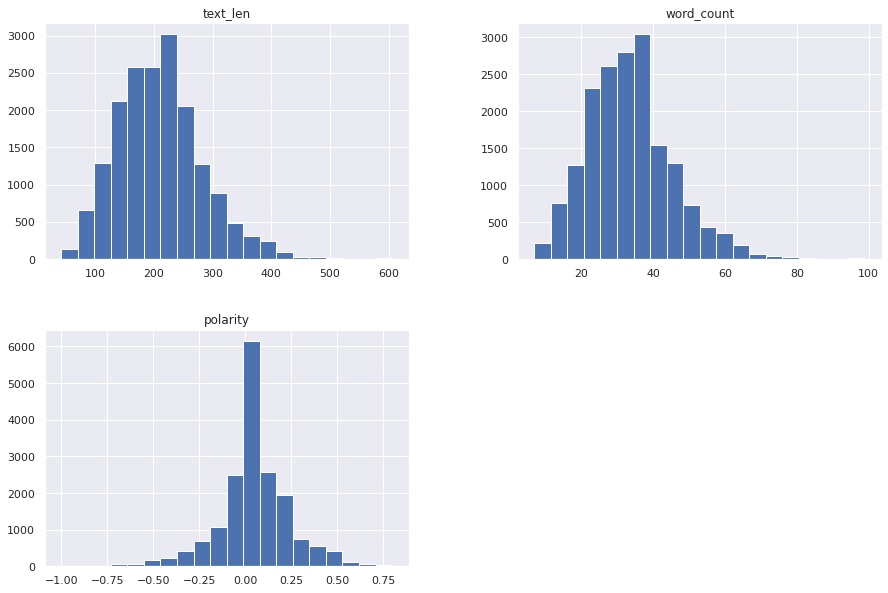

In [78]:
df[["text_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))


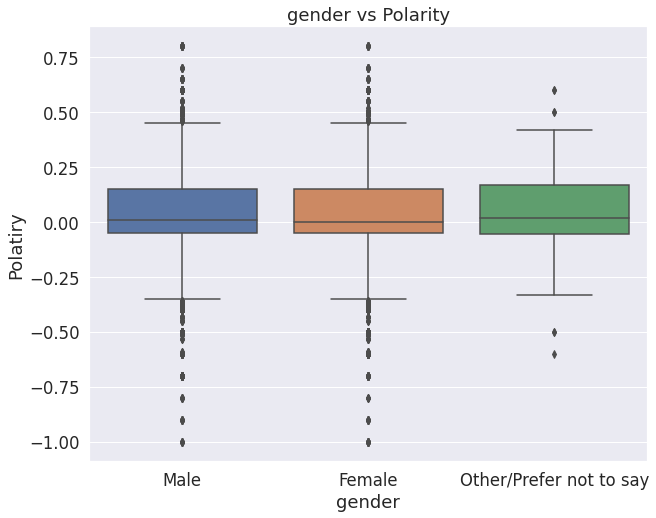

In [82]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'gender', y = 'polarity', data = df)
plt.xlabel("gender")
plt.ylabel("Polatiry")
plt.title("gender vs Polarity")
plt.show()

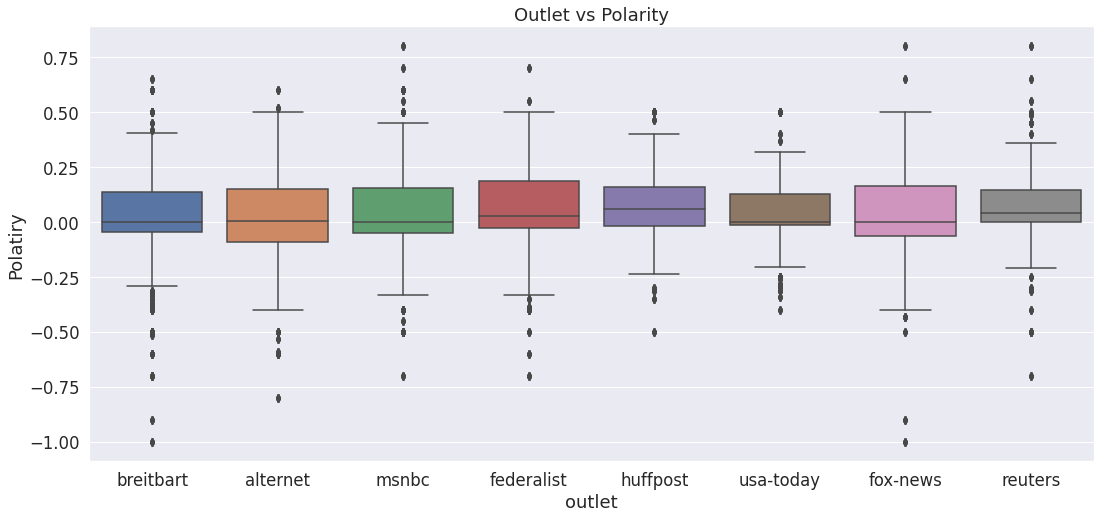

In [86]:
plt.figure(figsize = (18, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'outlet', y = 'polarity', data = df)
plt.xlabel("outlet")
plt.ylabel("Polatiry")
plt.title("Outlet vs Polarity")
plt.show()

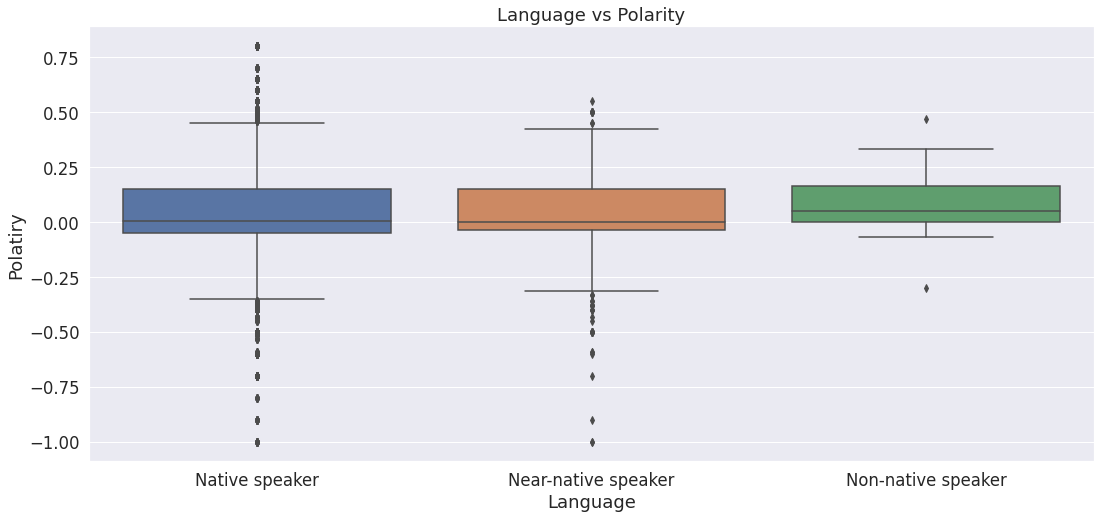

In [89]:
plt.figure(figsize = (18, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'native_english_speaker', y = 'polarity', data = df)
plt.xlabel("Language")
plt.ylabel("Polatiry")
plt.title("Language vs Polarity")
plt.show()

In [92]:
outlet_pol = df.groupby('outlet')['polarity'].agg([np.mean])
outlet_pol.columns = ['polarity']
outlet_pol = outlet_pol.sort_values('polarity', ascending=False)
outlet_pol = outlet_pol.head(20)
outlet_pol

,polarity
outlet,
huffpost,0.070990
reuters,0.061896
federalist,0.056865
usa-today,0.042448
fox-news,0.039863
msnbc,0.036479
breitbart,0.028698
alternet,0.022526


In [93]:
gender_pol = df.groupby('gender')['polarity'].agg([np.mean])
gender_pol.columns = ['polarity']
gender_pol = gender_pol.sort_values('polarity', ascending=False)
gender_pol= gender_pol.head(20)
gender_pol

,polarity
gender,
Other/Prefer not to say,0.054743
Male,0.040443
Female,0.038762


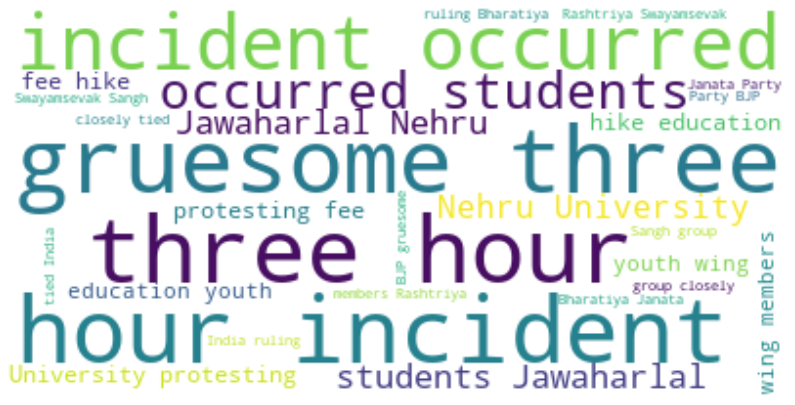

In [94]:
text = " ".join(review for text in df.text)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec=CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns = ['text', 'count'])
df1.head()

,text,count
0,trump,5004
1,president,2496
2,white,1546
3,people,1519
4,women,1467


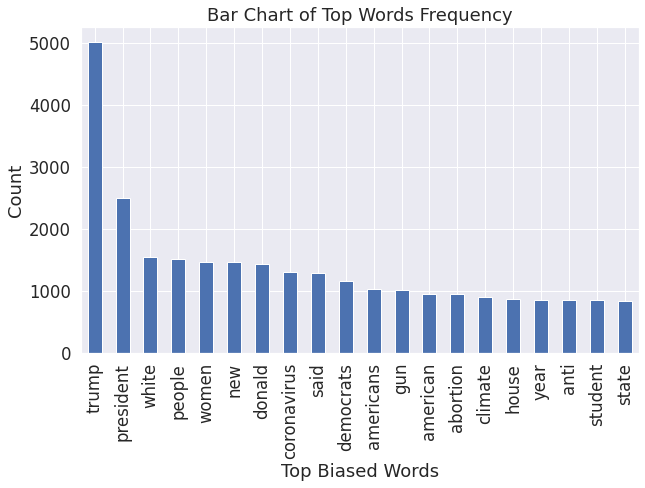

In [101]:
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Biased Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

In [104]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(stop_words='english',ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['text'], 30)
df2 = pd.DataFrame(common_words2, columns=['text', "Count"])
df2.head()

,text,Count
0,donald trump,1432
1,president donald,976
2,climate change,533
3,united states,506
4,trump administration,436


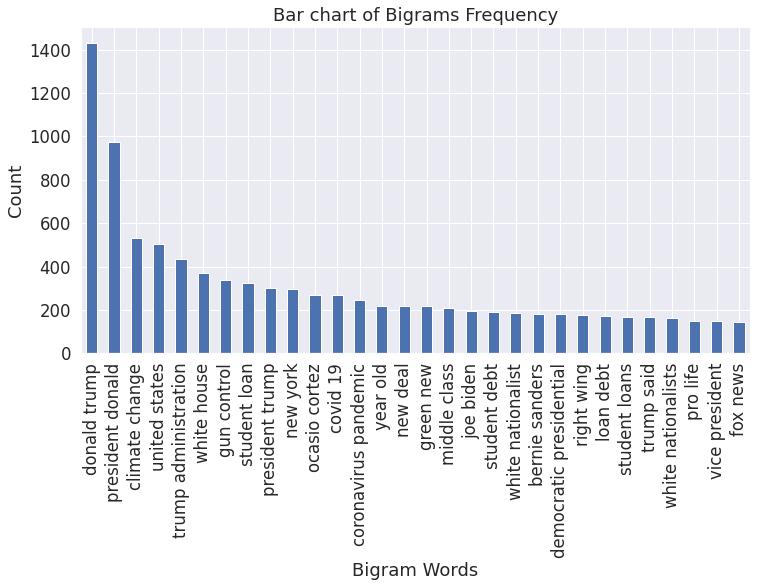

In [105]:
df2.groupby('text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

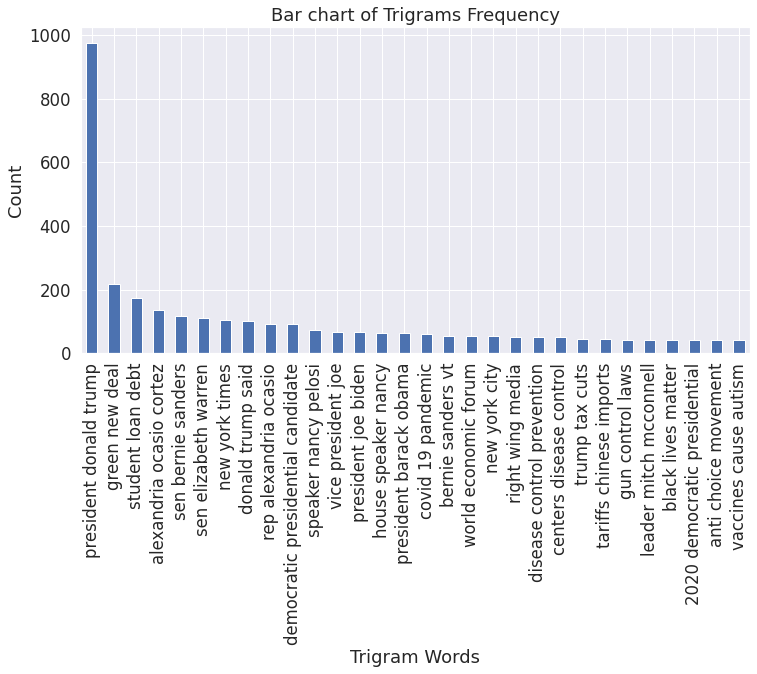

In [106]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['text'], 30)
df3 = pd.DataFrame(common_words3, columns = ['text' , 'Count'])
df3.groupby('text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

In [ ]:
!python -m textblob.download_corpora


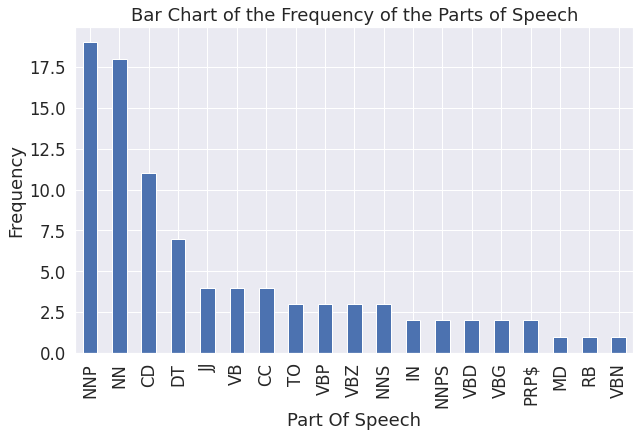

In [109]:
blob = TextBlob(str(df['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech",
           figsize=(10, 6))